In [34]:
import pandas as pd
from prophet import Prophet
import itertools
import numpy as np
import plotly.graph_objects as go
import yfinance as yf

In [35]:
data = yf.download(tickers='IRCTC.NS', period='1d', interval='5m')
data.to_csv("IRCTC.csv")

[*********************100%***********************]  1 of 1 completed


In [36]:
df_temp=pd.read_csv("CENTRALBK.csv")


df_temp.tail()

,Datetime,Open,High,Low,Close,Adj Close,Volume
1730,2021-10-05 14:15:00+05:30,22.85,22.900000,22.65,22.750000,22.750000,961769
1731,2021-10-05 15:15:00+05:30,22.75,22.750000,22.65,22.700001,22.700001,586387
1732,2021-10-06 09:15:00+05:30,22.85,23.049999,22.75,22.850000,22.850000,1584133
1733,2021-10-06 10:15:00+05:30,22.85,22.950001,22.75,22.900000,22.900000,660248
1734,2021-10-06 11:13:14+05:30,22.85,22.850000,22.85,22.850000,22.850000,0


In [37]:

#df_temp = pd.read_csv("IRCTC.csv")

In [38]:

df=df_temp[["Datetime","Close"]]


In [39]:
df[1:20]

,Datetime,Close
1,2020-10-06 11:15:00+05:30,13.65
2,2020-10-06 12:15:00+05:30,13.65
3,2020-10-06 13:15:00+05:30,13.50
4,2020-10-06 14:15:00+05:30,13.50
5,2020-10-06 15:15:00+05:30,13.50
6,2020-10-07 09:15:00+05:30,13.35
7,2020-10-07 10:15:00+05:30,13.30
8,2020-10-07 11:15:00+05:30,13.20
9,2020-10-07 12:15:00+05:30,13.00
10,2020-10-07 13:15:00+05:30,12.95


In [40]:
df

,Datetime,Close
0,2020-10-06 10:15:00+05:30,13.650000
1,2020-10-06 11:15:00+05:30,13.650000
2,2020-10-06 12:15:00+05:30,13.650000
3,2020-10-06 13:15:00+05:30,13.500000
4,2020-10-06 14:15:00+05:30,13.500000
...,...,...
1730,2021-10-05 14:15:00+05:30,22.750000
1731,2021-10-05 15:15:00+05:30,22.700001
1732,2021-10-06 09:15:00+05:30,22.850000
1733,2021-10-06 10:15:00+05:30,22.900000


In [41]:
date = pd.read_csv("date.csv")
df["Datetime"] = date["Date"]

<ipython-input-41-6d58ee315ab1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Datetime"] = date["Date"]


In [42]:
df

,Datetime,Close
0,9/23/2020,13.650000
1,9/24/2020,13.650000
2,9/25/2020,13.650000
3,9/26/2020,13.500000
4,9/27/2020,13.500000
...,...,...
1730,6/19/2025,22.750000
1731,6/20/2025,22.700001
1732,6/21/2025,22.850000
1733,6/22/2025,22.900000


In [43]:
df.dtypes

Datetime     object
Close       float64
dtype: object

In [44]:
#df["Datetime"]=pd.to_datetime(df["Datetime"])

In [45]:
df.dtypes

Datetime     object
Close       float64
dtype: object

In [46]:
df.columns=['ds','y']

In [47]:
df[-20:]

,ds,y
1715,6/4/2025,22.250000
1716,6/5/2025,22.200001
1717,6/6/2025,22.250000
1718,6/7/2025,22.400000
1719,6/8/2025,22.500000
1720,6/9/2025,22.500000
1721,6/10/2025,22.450001
1722,6/11/2025,22.400000
1723,6/12/2025,22.450001
1724,6/13/2025,22.450001


In [48]:
m= Prophet(interval_width=0.9,daily_seasonality=True)
model = m.fit(df)

In [49]:
future = m.make_future_dataframe(periods=271,freq='D')
forecast=m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-09-23,13.418562,11.235916,14.089197,13.418562,13.418562,-0.764294,-0.764294,-0.764294,-0.507119,...,0.032118,0.032118,0.032118,-0.289293,-0.289293,-0.289293,0.0,0.0,0.0,12.654268
1,2020-09-24,13.410966,11.299336,13.962651,13.410966,13.410966,-0.793396,-0.793396,-0.793396,-0.507119,...,0.010903,0.010903,0.010903,-0.297179,-0.297179,-0.297179,0.0,0.0,0.0,12.617571
2,2020-09-25,13.403371,11.230020,13.963096,13.403371,13.403371,-0.826161,-0.826161,-0.826161,-0.507119,...,-0.013851,-0.013851,-0.013851,-0.305191,-0.305191,-0.305191,0.0,0.0,0.0,12.577210
3,2020-09-26,13.395776,11.214116,14.033876,13.395776,13.395776,-0.804515,-0.804515,-0.804515,-0.507119,...,0.016225,0.016225,0.016225,-0.313620,-0.313620,-0.313620,0.0,0.0,0.0,12.591261
4,2020-09-27,13.388180,11.071668,13.934781,13.388180,13.388180,-0.839718,-0.839718,-0.839718,-0.507119,...,-0.009897,-0.009897,-0.009897,-0.322702,-0.322702,-0.322702,0.0,0.0,0.0,12.548462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,2026-03-17,20.887686,10.817437,32.162000,11.231638,31.955890,-0.185084,-0.185084,-0.185084,-0.507119,...,-0.022503,-0.022503,-0.022503,0.344539,0.344539,0.344539,0.0,0.0,0.0,20.702602
2002,2026-03-18,20.884564,10.897428,32.293196,11.172374,32.035244,-0.119524,-0.119524,-0.119524,-0.507119,...,0.032118,0.032118,0.032118,0.355477,0.355477,0.355477,0.0,0.0,0.0,20.765040
2003,2026-03-19,20.881442,10.829591,31.656139,11.113110,32.114598,-0.135242,-0.135242,-0.135242,-0.507119,...,0.010903,0.010903,0.010903,0.360974,0.360974,0.360974,0.0,0.0,0.0,20.746200
2004,2026-03-20,20.878320,10.658353,32.418178,11.053845,32.193952,-0.159793,-0.159793,-0.159793,-0.507119,...,-0.013851,-0.013851,-0.013851,0.361177,0.361177,0.361177,0.0,0.0,0.0,20.718527


In [50]:
print(forecast[["ds","yhat"]][-25:])
print(df[-10:])
forecast.dtypes
df.dtypes

             ds       yhat
1981 2026-02-25  19.933921
1982 2026-02-26  19.950892
1983 2026-02-27  19.967638
1984 2026-02-28  20.042222
1985 2026-03-01  20.063235
1986 2026-03-02  20.109449
1987 2026-03-03  20.150919
1988 2026-03-04  20.257618
1989 2026-03-05  20.288977
1990 2026-03-06  20.316657
1991 2026-03-07  20.398372
1992 2026-03-08  20.422437
1993 2026-03-09  20.467425
1994 2026-03-10  20.503276
1995 2026-03-11  20.599941
1996 2026-03-12  20.616915
1997 2026-03-13  20.626019
1998 2026-03-14  20.685213
1999 2026-03-15  20.683146
2000 2026-03-16  20.698801
2001 2026-03-17  20.702602
2002 2026-03-18  20.765040
2003 2026-03-19  20.746200
2004 2026-03-20  20.718527
2005 2026-03-21  20.740629
             ds          y
1725  6/14/2025  22.350000
1726  6/15/2025  22.299999
1727  6/16/2025  22.850000
1728  6/17/2025  23.049999
1729  6/18/2025  22.850000
1730  6/19/2025  22.750000
1731  6/20/2025  22.700001
1732  6/21/2025  22.850000
1733  6/22/2025  22.900000
1734  6/23/2025  22.850000


ds     object
y     float64
dtype: object

In [51]:
se = np.square(forecast.loc[:, 'yhat'] - df["y"])
mse = np.mean(se)
rmse = np.sqrt(mse)
rmse


0.8487342901120318

In [52]:
mse

0.7203498952119747

In [53]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [54]:
mse = mean_squared_error(df['y'], forecast.loc[:, 'yhat'][:-271])
mae = mean_absolute_error(df['y'], forecast.loc[:, 'yhat'][:-271])
r2 = r2_score(df['y'], forecast.loc[:, 'yhat'][:-271])

In [55]:
mse
rmse

0.8487342901120318

In [56]:
mae

0.58495705983374

In [57]:
r2

0.9639904177667955

In [64]:
forecast[-271:-230]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1735,2025-06-24,21.718109,20.845775,23.554194,21.718109,21.718109,0.429554,0.429554,0.429554,-0.507119,...,-0.022503,-0.022503,-0.022503,0.959176,0.959176,0.959176,0.0,0.0,0.0,22.147663
1736,2025-06-25,21.714988,20.882543,23.691043,21.714988,21.714988,0.610385,0.610385,0.610385,-0.507119,...,0.032118,0.032118,0.032118,1.085386,1.085386,1.085386,0.0,0.0,0.0,22.325373
1737,2025-06-26,21.711866,21.053740,23.772184,21.711866,21.711866,0.722208,0.722208,0.722208,-0.507119,...,0.010903,0.010903,0.010903,1.218424,1.218424,1.218424,0.0,0.0,0.0,22.434074
1738,2025-06-27,21.708744,21.104382,23.873870,21.708744,21.708744,0.835848,0.835848,0.835848,-0.507119,...,-0.013851,-0.013851,-0.013851,1.356819,1.356819,1.356819,0.0,0.0,0.0,22.544592
1739,2025-06-28,21.705622,21.293454,24.113431,21.705622,21.705622,1.008075,1.008075,1.008075,-0.507119,...,0.016225,0.016225,0.016225,1.498969,1.498969,1.498969,0.0,0.0,0.0,22.713697
1740,2025-06-29,21.702500,21.522001,24.208916,21.702500,21.702500,1.126159,1.126159,1.126159,-0.507119,...,-0.009897,-0.009897,-0.009897,1.643175,1.643175,1.643175,0.0,0.0,0.0,22.828659
1741,2025-06-30,21.699378,21.553961,24.304884,21.699378,21.699616,1.267556,1.267556,1.267556,-0.507119,...,-0.012995,-0.012995,-0.012995,1.787671,1.787671,1.787671,0.0,0.0,0.0,22.966934
1742,2025-07-01,21.696256,21.705018,24.509843,21.696256,21.700235,1.401032,1.401032,1.401032,-0.507119,...,-0.022503,-0.022503,-0.022503,1.930654,1.930654,1.930654,0.0,0.0,0.0,23.097288
1743,2025-07-02,21.693134,21.872753,24.761777,21.692839,21.701758,1.595326,1.595326,1.595326,-0.507119,...,0.032118,0.032118,0.032118,2.070327,2.070327,2.070327,0.0,0.0,0.0,23.288460
1744,2025-07-03,21.690012,21.961296,24.751378,21.688867,21.704110,1.708710,1.708710,1.708710,-0.507119,...,0.010903,0.010903,0.010903,2.204926,2.204926,2.204926,0.0,0.0,0.0,23.398722


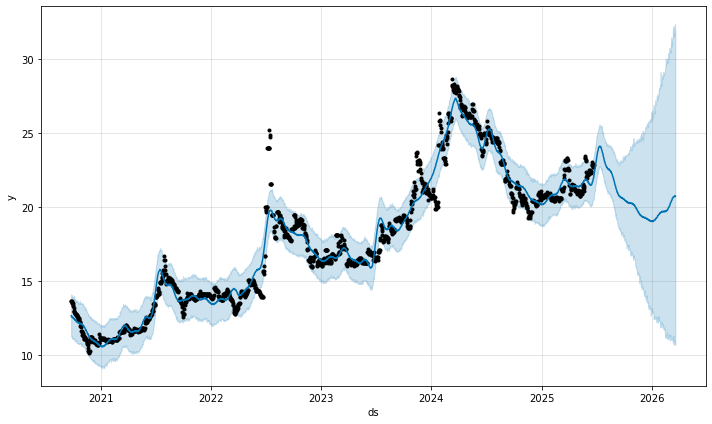

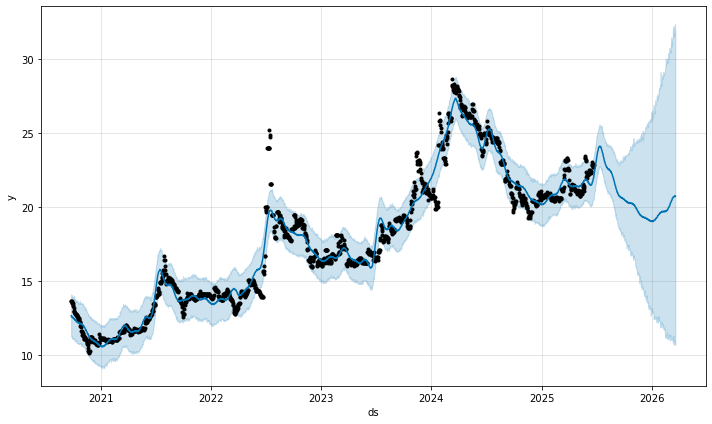

In [59]:
m.plot(forecast)

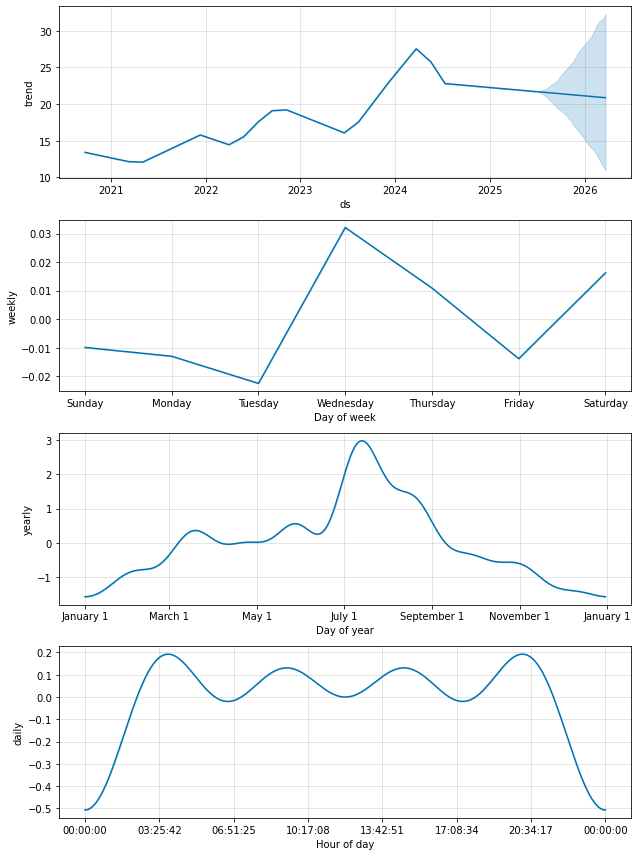

In [60]:
plot2 = m.plot_components(forecast)